Output: inspction_lv.csv and business_lv.csv.

The last four colums in inspction_lv.csv file: 

* Nearest_yelp_business - row number(index) in business_lv.csv

* Nearest_yelp_name - name in business_lv.csv

* Nearest_yelp_address - address in business_lv.csv

* Nearest_yelp_id - business_id in business_lv.csv

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import geopandas as gpd
from scipy.spatial import distance,cKDTree
from scipy import stats
from difflib import SequenceMatcher
from shapely.geometry import Point

OSError: Could not find lib geos_c or load any of its variants ['/Library/Frameworks/GEOS.framework/Versions/Current/GEOS', '/opt/local/lib/libgeos_c.dylib'].

In [ ]:
import geopandas as gpd

In [2]:
%matplotlib inline

In [3]:
business = pd.read_json("./data/business.json", lines=True)
business.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{u'RestaurantsPriceRange2': 2, u'BusinessParki...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{u'Monday': u'10:00-22:00', u'Tuesday': u'10:0...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{u'BusinessParking': {u'garage': False, u'stre...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{u'Monday': u'10:00-19:00', u'Tuesday': u'10:0...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{u'Tuesday': u'9:00-17:00', u'Friday': u'9:00-...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{u'GoodForMeal': {u'dessert': False, u'latenig...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [5]:
#businessSF = business[business.city == "San Francisco"]
#businessSF.describe()
localInspectCities = ["Anchorage", "Boulder", "Evanston", "Richardson", "Marin", \
                      "San Diego", "Cumberland", "Fort Worth", "Lewisville", "Lexington" \
                     "Los Angeles", "Louisville", "Mecklenburg", "Orange", "Riverside", \
                     "Sacramento", "San Bernardino", "San Francisco", "Wake"]

business[business.city.isin(localInspectCities)]
business[business.city == "Toronto"].describe()
business[business.city == "Henderson"]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
159,"2920 N Green Valley Pkwy, Bldg 2, Ste 218","{u'BusinessAcceptsCreditCards': False, u'Busin...",fo3PlEufPJ5rSocxmFhJNg,"[Property Management, Home Services, Real Estate]",Henderson,"{u'Tuesday': u'9:00-17:00', u'Friday': u'9:00-...",1,36.075692,-115.081292,Centurion Management Services,,89014,25,2.0,NV
173,3370 St Rose Pkwy,"{u'BusinessAcceptsCreditCards': True, u'ByAppo...",Ek4ZVbzF6vJkgqfK-576wA,"[Real Estate, Home Services, Property Manageme...",Henderson,"{u'Monday': u'9:00-19:00', u'Tuesday': u'9:00-...",1,35.994071,-115.135217,Veritas,Southeast,89052,36,4.0,NV
183,"4602 Sunset Rd, Unit A","{u'BusinessAcceptsCreditCards': True, u'Restau...",Wc5uwZnd_U64B9-CQhjcRQ,"[Local Services, Sewing & Alterations, Dry Cle...",Henderson,{},1,36.072382,-115.072869,Thrift DLux,,89014,22,4.0,NV
314,1401 S Boulder Hwy,"{u'Alcohol': u'none', u'HasTV': False, u'GoodF...",IxU1xb7j8SM9WPghWWlE_Q,"[Hot Dogs, Burgers, Restaurants]",Henderson,{},0,36.013400,-114.957476,Sucker-Punch Grill,,89015,5,5.0,NV
318,"76 W Horizon Ridge, Ste 140","{u'BusinessParking': {u'garage': False, u'stre...",bFivfq9tbnfyokkzRpQ4GQ,"[Hair Salons, Beauty & Spas]",Henderson,"{u'Tuesday': u'9:00-19:00', u'Friday': u'9:00-...",0,36.013921,-114.992880,Divine Salon,,89012,12,3.5,NV
399,"9017 S Pecos Rd, Ste 4325","{u'BusinessParking': {u'garage': False, u'stre...",5TFXzPJh8JZK218_1aaTzg,"[Doctors, Beauty & Spas, Naturopathic/Holistic...",Henderson,"{u'Monday': u'10:00-22:00', u'Tuesday': u'10:0...",1,36.025678,-115.102309,Sola Sofia,,89074,3,5.0,NV
400,714 S. Boulder Highway,"{u'Alcohol': u'none', u'HasTV': False, u'GoodF...",L4PI4kh8plShtrcWt6aBTQ,"[Chicken Wings, Restaurants, Pizza]",Henderson,"{u'Monday': u'10:30-23:00', u'Tuesday': u'10:3...",1,36.031596,-114.970039,Pizza Hut,,89015,12,2.0,NV
401,190 N. Boulder Hwy,{},eA8RJa5U2Ep8Ks3ECE6xfA,"[Restaurants, Bakeries, Grocery, Delis, Food]",Henderson,"{u'Monday': u'5:00-0:00', u'Tuesday': u'5:00-0...",0,36.041640,-114.981263,Haggen Food & Pharmacy,,89015,5,3.0,NV
473,299 N Pecos Rd,"{u'AcceptsInsurance': True, u'ByAppointmentOnl...",1l3CCCtXMhlHoGHNtQSDCw,"[Health & Medical, Ophthalmologists, Optometri...",Henderson,{},1,36.049444,-115.100603,Sunset Eye Center,,89074,7,4.0,NV
474,76 N Stephanie St,"{u'GoodForMeal': {u'dessert': False, u'latenig...",QMabpBYQ2qAh16GPbCvMrA,"[Restaurants, Burgers, Fast Food, Food]",Henderson,{},1,36.033347,-115.046293,Wendy's,,89074,20,3.0,NV


In [6]:
business.city.value_counts()

Las Vegas                     24768
Phoenix                       15656
Toronto                       15483
Charlotte                      7557
Scottsdale                     7510
Pittsburgh                     5688
Montréal                       5175
Mesa                           5146
Henderson                      4130
Tempe                          3949
Chandler                       3649
Edinburgh                      3625
Cleveland                      2979
Madison                        2891
Glendale                       2841
Gilbert                        2835
Mississauga                    2316
Stuttgart                      1975
Peoria                         1527
Markham                        1390
North Las Vegas                1254
Champaign                      1084
North York                      944
Surprise                        934
Scarborough                     870
Richmond Hill                   770
Concord                         726
Goodyear                    

In [7]:
inspection = pd.read_csv('Restaurant_Inspections.csv')
inspection.head(5)

,Serial Number,Permit Number,Restaurant Name,Location Name,Category Name,Address,City,State,Zip,Current Demerits,...,Inspection Time,Employee ID,Inspection Type,Inspection Demerits,Inspection Grade,Permit Status,Inspection Result,Violations,Record Updated,Location 1
0,DA0BEBWGS,PR0003177,7-Eleven #32224 - SNACK BAR,7-Eleven Convenience Store #32224,Snack Bar,5576 Boulder Hwy,Las Vegas,Nevada,89122-6010,3,...,02/09/2017 10:00:00 AM,EE7000559,Routine Inspection,3,A,A,'A' Grade,"215,2927",02/09/2017 10:37:14 AM,"(36.101164, 115.0522322)"
1,DA0EIV6VF,PR0001432,"Bryan, Roger M Elem School Kitchen","Bryan, Roger M Elem School",Elementary School Kitchen,8255 W Katie Ave,Las Vegas,Nevada,89147-4123,0,...,08/22/2017 07:30:00 AM,EE7001076,Routine Inspection,0,A,A,'A' Grade,NaN,08/22/2017 08:57:02 AM,"(36.1196147, 115.2711357)"
2,DA0FV5BDD,PR0006817,SUNCOAST GARDE MANGER,Suncoast Hotel & Casino,Vegetable Prep,9090 Alta Dr,Las Vegas,Nevada,89145-8508,5,...,09/18/2017 04:30:00 PM,EE7001259,Routine Inspection,5,A,A,'A' Grade,"209,2910,2928,2930",09/18/2017 06:55:11 PM,"(36.1691108, 115.2913032)"
3,DA0FXU0W0,PR0016321,BROTHERS ITALIAN BISTRO,BROTHERS ITALIAN BISTRO,Restaurant,7121 W Craig Rd 101,Las Vegas,Nevada,89129,0,...,09/18/2017 01:15:00 PM,EE7000860,Re-inspection,0,A,A,'A' Grade,NaN,09/18/2017 02:12:46 PM,"(36.2394009, 115.2493787)"
4,DA0RRJEPK,PR0008066,Barley's Brewer's Cafe,Barley's Casino & Brewing Co,Restaurant,4500 E Sunset Rd,Henderson,Nevada,89014-2252,6,...,02/28/2017 03:45:00 PM,EE7000772,Routine Inspection,6,A,A,'A' Grade,"218,2928,2930,2955",02/28/2017 04:43:44 PM,"(36.0719129, 115.0748334)"


In [8]:
float(inspection.at[1, 'Location 1'].split(',')[1][:-1])

115.2711357

In [9]:
def getInspectionLoc(ix):
    locStr = inspection.at[ix, 'Location 1']
    lat = float(locStr.split(',')[0][1:])
    lon = float(locStr.split(',')[1][:-1])
    if(lon > 0):
        lon = -lon
    return Point((lon, lat))

def getYelpLoc(ix):
    return Point((business.at[ix, 'longitude'], business.at[ix, 'latitude']))

In [10]:
inspection['geometry'] = inspection.index.map(getInspectionLoc)
business['geometry'] = business.index.map(getYelpLoc)
crs = {'init': 'epsg:4326'}
inspection_geo = gpd.GeoDataFrame(inspection, crs=crs, geometry='geometry')
business_geo = gpd.GeoDataFrame(business, crs=crs, geometry='geometry')

(35.9, 36.4)

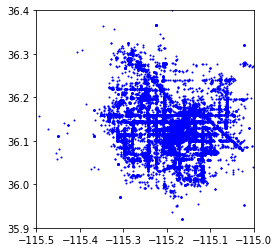

In [62]:
# mask out other cities
#business_lv = business[business.city == 'Las Vegas']
business_geo_lv = business_geo[business_geo.city == 'Las Vegas']
business_geo_lv.plot(color='blue', markersize=1)
plt.xlim([-115.5, -115])
plt.ylim([35.9, 36.4])

(35.9, 36.4)

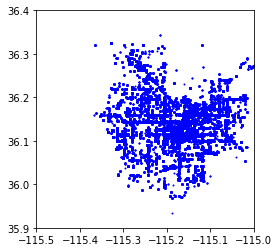

In [63]:
#inspection_lv = inspection[inspection.City == 'Las Vegas']
inspection_geo_lv = inspection_geo[inspection_geo.City == 'Las Vegas']
inspection_geo_lv.plot(color='blue', markersize=1)
plt.xlim([-115.5, -115])
plt.ylim([35.9, 36.4])

In [32]:
inspection_geo_lv['geometry'].head(5)

0     POINT (-115.0522322 36.101164)
1    POINT (-115.2711357 36.1196147)
2    POINT (-115.2913032 36.1691108)
3    POINT (-115.2493787 36.2394009)
5    POINT (-115.1652708 36.1293177)
Name: geometry, dtype: object

In [149]:
inspection_geo_lv = inspection_geo_lv[inspection_geo_lv.geometry.notnull()]
inspection_geo_lv = inspection_geo_lv[inspection_geo_lv.Address.notnull()]
inspection_geo_lv.index = np.arange(inspection_geo_lv.shape[0])
inspection_geo_lv.describe()

,Current Demerits,Inspection Demerits,Nearest_yelp_business
count,117306.000000,117306.000000,117306.000000
mean,3.969388,5.903679,4363.813292
std,4.194667,6.697276,7323.359693
min,0.000000,0.000000,-1.000000
25%,0.000000,1.000000,-1.000000
50%,3.000000,5.000000,-1.000000
75%,7.000000,8.000000,6888.000000
max,100.000000,250.000000,24754.000000


In [82]:
business_geo_lv = business_geo_lv[business_geo_lv.geometry.notnull()]
business_geo_lv.index = np.arange(business_geo_lv.shape[0])
business_geo_lv.describe()

,is_open,latitude,longitude,review_count,stars
count,24768.000000,24768.000000,24768.000000,24768.000000,24768.000000
mean,0.834222,36.127721,-115.195935,58.797036,3.712997
std,0.371889,0.467254,0.335178,199.822721,1.017116
min,0.000000,-36.086009,-121.856157,3.000000,1.000000
25%,1.000000,36.098747,-115.249574,5.000000,3.000000
50%,1.000000,36.126229,-115.191127,13.000000,4.000000
75%,1.000000,36.161774,-115.149267,38.000000,4.500000
max,1.000000,39.288535,-76.618728,6979.000000,5.000000


In [150]:
def locmat(geometry):
    dim = geometry.shape[0]
    lon = np.reshape(geometry.apply(lambda p: p.x), (dim, 1))
    lat = np.reshape(geometry.apply(lambda p: p.y), (dim, 1))
    loc = np.concatenate((lon, lat), axis=1)
    return loc

inspectionDistmat = locmat(inspection_geo_lv['geometry'])
businessDistmat = locmat(business_geo_lv['geometry'])

In [167]:
BusinessTree = cKDTree(businessDistmat)

def findNearestYelpBusiness(ix):
    dist, nearest = BusinessTree.query(inspectionDistmat[ix], k = 1)
    nameSim = SequenceMatcher(None, inspection_geo_lv['Restaurant Name'][ix], business_geo_lv['name'][nearest]).ratio()
    try: 
        addrSim = SequenceMatcher(None, inspection_geo_lv['Address'][ix], business_geo_lv['address'][nearest]).ratio()
    except:
        print inspection_geo_lv['Address'][ix]
        print business_geo_lv['address'][nearest]
    insAddrNum = [int(s) for s in inspection_geo_lv['Address'][ix].split() if s.isdigit()]
    busiAddrNum = [int(s) for s in business_geo_lv['address'][nearest].split() if s.isdigit()]
    if(dist < 0.005 and nameSim > 0.4 and addrSim > 0.8 and insAddrNum == busiAddrNum):
        return nearest
    else: 
        return -1

nearest_business = inspection_geo_lv.index.map(findNearestYelpBusiness)    

In [173]:
def nearestYelpName(ix):
    if ix == -1:
        return np.nan
    else:
        return business_geo_lv['name'][ix]

def nearestYelpAddress(ix):
    if ix == -1:
        return np.nan
    else:
        return business_geo_lv['address'][ix]
    
def nearestYelpID(ix):
    if ix == -1:
        return np.nan
    else:
        return business_geo_lv['business_id'][ix]

inspection_geo_lv['Nearest_yelp_business'] = nearest_business
inspection_geo_lv['Nearest_yelp_name'] = inspection_geo_lv['Nearest_yelp_business'].apply(lambda i: nearestYelpName(i))
inspection_geo_lv['Nearest_yelp_address'] = inspection_geo_lv['Nearest_yelp_business'].apply(lambda i: nearestYelpAddress(i))
inspection_geo_lv['Nearest_yelp_id'] = inspection_geo_lv['Nearest_yelp_business'].apply(lambda i: nearestYelpID(i))

In [174]:
inspection_geo_lv[inspection_geo_lv.Nearest_yelp_name.notnull()].describe()

,Current Demerits,Inspection Demerits,Nearest_yelp_business
count,12641.000000,12641.000000,12641.000000
mean,4.494106,6.392216,12131.941619
std,4.220015,6.660966,7118.741549
min,0.000000,0.000000,31.000000
25%,0.000000,2.000000,6035.000000
50%,3.000000,5.000000,11501.000000
75%,8.000000,9.000000,18087.000000
max,100.000000,86.000000,24742.000000


In [175]:
inspection_geo_lv.head(50)

,Serial Number,Permit Number,Restaurant Name,Location Name,Category Name,Address,City,State,Zip,Current Demerits,...,Permit Status,Inspection Result,Violations,Record Updated,Location 1,geometry,Nearest_yelp_business,Nearest_yelp_name,Nearest_yelp_address,Nearest_yelp_id
0,DA0BEBWGS,PR0003177,7-Eleven #32224 - SNACK BAR,7-Eleven Convenience Store #32224,Snack Bar,5576 Boulder Hwy,Las Vegas,Nevada,89122-6010,3,...,A,'A' Grade,"215,2927",02/09/2017 10:37:14 AM,"(36.101164, 115.0522322)",POINT (-115.0522322 36.101164),9639,7-Eleven,5576 Boulder Hwy,XBlUgpFOvm05WSCgErQ_Ow
1,DA0EIV6VF,PR0001432,"Bryan, Roger M Elem School Kitchen","Bryan, Roger M Elem School",Elementary School Kitchen,8255 W Katie Ave,Las Vegas,Nevada,89147-4123,0,...,A,'A' Grade,NaN,08/22/2017 08:57:02 AM,"(36.1196147, 115.2711357)",POINT (-115.2711357 36.1196147),-1,NaN,NaN,NaN
2,DA0FV5BDD,PR0006817,SUNCOAST GARDE MANGER,Suncoast Hotel & Casino,Vegetable Prep,9090 Alta Dr,Las Vegas,Nevada,89145-8508,5,...,A,'A' Grade,"209,2910,2928,2930",09/18/2017 06:55:11 PM,"(36.1691108, 115.2913032)",POINT (-115.2913032 36.1691108),-1,NaN,NaN,NaN
3,DA0FXU0W0,PR0016321,BROTHERS ITALIAN BISTRO,BROTHERS ITALIAN BISTRO,Restaurant,7121 W Craig Rd 101,Las Vegas,Nevada,89129,0,...,A,'A' Grade,NaN,09/18/2017 02:12:46 PM,"(36.2394009, 115.2493787)",POINT (-115.2493787 36.2394009),-1,NaN,NaN,NaN
4,DA0W0JYWT,PR0102626,ENCORE ANDREAS BAR,ENCORE HOTEL & CASINO,Bar / Tavern,3121 S Las Vegas Blvd,Las Vegas,Nevada,89109-1967,0,...,A,'A' Grade,NaN,01/12/2017 07:19:49 PM,"(36.1293177, 115.1652708)",POINT (-115.1652708 36.1293177),-1,NaN,NaN,NaN
5,DA0YIRLC4,PR0001202,Taco Bell #7,Taco Bell,Restaurant,2565 E Tropicana Ave,Las Vegas,Nevada,89121-7301,8,...,A,'A' Grade,"202,218,2930",01/05/2017 02:58:54 PM,"(36.0995914, 115.1149698)",POINT (-115.1149698 36.0995914),-1,NaN,NaN,NaN
6,DA0OCAHYH,PR0021910,Baja Fresh,Baja Fresh,Restaurant,4343 N Rancho Dr,Las Vegas,Nevada,89130-3425,6,...,A,'A' Grade,"2909,2928,2929,2930,2955",02/09/2017 11:27:56 AM,"(36.2388477, 115.232952)",POINT (-115.232952 36.2388477),-1,NaN,NaN,NaN
7,DA0TJMY9H,PR0016192,Tacos El Rodeo,Tacos El Rodeo,Restaurant,2115 N Decatur Blvd,Las Vegas,Nevada,89108-2916,8,...,A,'A' Grade,"202,211,2929",09/14/2017 04:25:42 PM,"(36.19739, 115.2062)",POINT (-115.2062 36.19739),-1,NaN,NaN,NaN
8,DA0H3CWZB,PR0105594,SCOOPS III,SCOOPS III,Restaurant,3655 S DURANGO Dr,Las Vegas,Nevada,89147,0,...,A,'A' Grade,2929,03/02/2017 01:26:02 PM,"(36.1238755, 115.279439)",POINT (-115.279439 36.1238755),-1,NaN,NaN,NaN
9,DA0HL2ZNQ,PR0011683,PT'S Burger Express,PT'S Pub #502,Restaurant,347 N Nellis Blvd,Las Vegas,Nevada,89110-5323,6,...,A,'A' Grade,"216,2912,2930,2955",07/19/2017 01:24:13 PM,"(36.1694104, 115.0622276)",POINT (-115.0622276 36.1694104),-1,NaN,NaN,NaN


In [179]:
inspection_geo_lv_output = inspection_geo_lv[inspection_geo_lv.Nearest_yelp_id.notnull()]
inspection_geo_lv_output.index = np.arange(inspection_geo_lv_output.shape[0])
inspection_geo_lv_output.head(20)

,Serial Number,Permit Number,Restaurant Name,Location Name,Category Name,Address,City,State,Zip,Current Demerits,...,Permit Status,Inspection Result,Violations,Record Updated,Location 1,geometry,Nearest_yelp_business,Nearest_yelp_name,Nearest_yelp_address,Nearest_yelp_id
0,DA0BEBWGS,PR0003177,7-Eleven #32224 - SNACK BAR,7-Eleven Convenience Store #32224,Snack Bar,5576 Boulder Hwy,Las Vegas,Nevada,89122-6010,3,...,A,'A' Grade,"215,2927",02/09/2017 10:37:14 AM,"(36.101164, 115.0522322)",POINT (-115.0522322 36.101164),9639,7-Eleven,5576 Boulder Hwy,XBlUgpFOvm05WSCgErQ_Ow
1,DA0M3K7AJ,PR0021072,Los Toritos Grill,Los Toritos Grill,Restaurant,2560 S Maryland Pkwy 9,Las Vegas,Nevada,89109-1695,19,...,B,'B' Downgrade,"202,208,211,212,2909,2929,2930",08/07/2017 02:18:46 PM,"(36.1425945, 115.1353042)",POINT (-115.1353042 36.1425945),18087,Tacos Los Toritos,"2560 S Maryland Pkwy, Ste 9",h-whOh2Bu2rL6zjvXXVtog
2,DA0M9F551,PR0011840,McMullan's Irish Pub Bar,McMullan's Irish Pub,Bar / Tavern,4650 W Tropicana Ave,Las Vegas,Nevada,89103-5249,3,...,A,'A' Grade,2955,05/08/2017 03:35:42 PM,"(36.1016609, 115.2042887)",POINT (-115.2042887 36.1016609),23788,McMullan's Irish Pub,4650 W Tropicana Ave,tsf1JNdeeQf_654YUSrzRw
3,DA0KYNII0,PR0012321,Lodge at Hualapai Restaurant,Lodge @ Hualapai Restaurant/Bar,Restaurant,3460 S Hualapai Way,Las Vegas,Nevada,89117-7707,6,...,A,'A' Grade,"212,213,2928",02/23/2017 04:07:52 PM,"(36.127405, 115.314955)",POINT (-115.314955 36.127405),8690,The Lodge Hualapai,3460 S Hualapai Way,uufFYaIiNeISTgzSsEcYwg
4,DA0FJWX5Y,PR0000016,Marie Callender's Restaurant/Bakery,Marie Callender's Restaurant/Bakery,Restaurant,3081 N Rainbow Blvd,Las Vegas,Nevada,89108-4577,3,...,C,'C' Downgrade,"202,206,207,209,212,216,218,2908,2910,2927,292...",06/14/2017 01:01:38 PM,"(36.2160614, 115.2425515)",POINT (-115.2425515 36.2160614),9252,Marie Callender's Restaurants & Bakeries,3081 N Rainbow Blvd,SeMgnNW76ob86w0_h62iVQ
5,DA0AKFT3J,PR0000873,Arby's #6821,Arby's,Restaurant,3477 S Durango Dr,Las Vegas,Nevada,89117-4127,5,...,A,'A' Grade,204,07/06/2017 10:59:55 AM,"(36.1274548, 115.2793754)",POINT (-115.2793754 36.1274548),20255,Arby's,3477 S Durango Dr,FEEJ4rK8EZ7cqIvBM5luGg
6,DA1768457,PR0024276,Golden China #2,GOLDEN CHINA #2,Restaurant,4416 N Rancho Dr,Las Vegas,Nevada,89130,9,...,B,'B' Downgrade,"211,213,215,222,2910,2912,2927,2930,2955",02/22/2017 08:34:59 AM,"(36.2399124, 115.2304425)",POINT (-115.2304425 36.2399124),18587,Golden China,4416 N Rancho Dr,phTLTkqSvylLkmz5wAwhTw
7,DA0RO9YAN,PR0019857,Big League Dreams Stadium Club West - Restaurant,Bld Stadium Club,Restaurant,3151 E Washington Ave,Las Vegas,Nevada,89101-1114,6,...,A,'A' Grade,"218,2909,2927,2930",04/20/2017 12:21:23 PM,"(36.180792, 115.103976)",POINT (-115.103976 36.180792),16789,Big League Dreams Sport Park,3151 E Washington Ave,4F_7Ihf9FBXCW6PUllXptA
8,DA0Z4OUGL,PR0004532,Bonanza Restaurant,Bonanza Lounge,Restaurant,4301 E Bonanza Rd,Las Vegas,Nevada,89110-2201,3,...,A,'A' Grade,"211,2930",04/06/2017 09:28:40 AM,"(36.1734633, 115.0829537)",POINT (-115.0829537 36.1734633),23585,Bonanza Lounge,4301 E Bonanza Rd,qhQS3KPJs9cya6tcQCEk2A
9,DA12T9YNB,PR0016155,Short Line Express Market - SNACK BAR,Short Line Express Market #10,Snack Bar,6390 N Durango Dr,Las Vegas,Nevada,89149-0255,0,...,A,'A' Grade,NaN,04/04/2017 10:55:49 AM,"(36.276911, 115.287141)",POINT (-115.287141 36.276911),19400,Texaco Short Line Express Market,6390 N Durango Dr,5k2rzQJ_YroCyKsnt63XFg


In [190]:
#inspection_geo_lv_output.to_csv('./data/inspection_lv.csv', encoding = 'utf-8')
#business_geo_lv.to_csv('./data/business_lv.csv', encoding = 'utf-8')